# Investigating Netflix Movies

## Description

The Netflix Movies and TV Shows dataset contains information about the wide range of content available on Netflix.

In this notebook, I explore Netflix’s dataset to uncover insights about its movies and shows. The analysis includes examining content by genre, release year, and country, along with visualizations to understand patterns and trends in Netflix’s global catalog.

## Dataset

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

## Data Import
In this section, we import the necessary Python libraries, load the dataset, and perform a quick summary to understand its structure and key characteristics.


### Required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Operation completed successfully ✅")

Operation completed successfully ✅


#### Data loading

In [14]:
# Load the dataset
df = pd.read_csv("src/netflix_data.csv") # , parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}

print("Operation completed successfully ✅")

Operation completed successfully ✅


## Inspection and Validation

### Initial exploration

In [15]:
# Dataframe shape (Row x Columns)
print(f"Number of rows: {df.shape[0]}\nNumber of  columns: {df.shape[1]}")


Number of rows: 7787
Number of  columns: 11


In [16]:
# General summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [17]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


### Handling missing values

In [18]:
# Check the presence of missing values
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
duration        False
description     False
genre           False
dtype: bool

In [19]:
# Check percentage of missing data per column
df.isnull().mean() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
duration         0.000000
description      0.000000
genre            0.000000
dtype: float64

In [20]:
# Replace the missing values in 'director' and 'cast' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Drop the missing values in 'date_added'
df = df.dropna(subset=['date_added'])

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [21]:
# Display the total number of missing values per columns
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

### Handle date and time series

In [22]:
#Convert date columns to datetime objects
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False, errors='coerce')
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [23]:
# Extract useful time-based features and create a new column for each
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month

print("Operation completed successfully ✅")

Operation completed successfully ✅


### Final exploration

In [24]:
# Dataframe shape (Row x Columns)
print(f"Number of rows:{df.shape[0]}\nNumber of  columns: {df.shape[1]}")


Number of rows:7777
Number of  columns: 13


In [25]:
# General summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   datetime64[ns]
 8   duration      7777 non-null   int64         
 9   description   7777 non-null   object        
 10  genre         7777 non-null   object        
 11  added_year    7777 non-null   int32         
 12  added_month   7777 non-null   int32         
dtypes: datetime64[ns](2), int32(2), int64(1), object(8)
memory usage: 789.9+ KB


In [26]:
# Check the presence of missing values
df.isna().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
duration        False
description     False
genre           False
added_year      False
added_month     False
dtype: bool

In [27]:
# Check total number of unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


show_id: 7777 unique values
type: 2 unique values
title: 7777 unique values
director: 4050 unique values
cast: 6822 unique values
country: 82 unique values
date_added: 1512 unique values
release_year: 73 unique values
duration: 206 unique values
description: 7759 unique values
genre: 35 unique values
added_year: 14 unique values
added_month: 12 unique values


In [28]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre,added_year,added_month
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020-01-01,4,In a future where the elite inhabit an island ...,International TV,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016-01-01,93,After a devastating earthquake hits Mexico Cit...,Dramas,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011-01-01,78,"When an army recruit is found dead, his fellow...",Horror Movies,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009-01-01,80,"In a postapocalyptic world, rag-doll robots hi...",Action,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008-01-01,123,A brilliant group of students become card-coun...,Dramas,2020,1


In [29]:
# Statistical summary of numerical columns
df.describe()

,date_added,release_year,duration,added_year,added_month
count,7777,7777,7777.000000,7777.000000,7777.000000
mean,2019-01-02 19:20:57.708627968,2013-12-08 10:55:17.166002432,69.204706,2018.493378,6.783850
min,2008-01-01 00:00:00,1925-01-01 00:00:00,1.000000,2008.000000,1.000000
25%,2018-02-01 00:00:00,2013-01-01 00:00:00,2.000000,2018.000000,4.000000
50%,2019-03-08 00:00:00,2017-01-01 00:00:00,88.000000,2019.000000,7.000000
75%,2020-01-20 00:00:00,2018-01-01 00:00:00,106.000000,2020.000000,10.000000
max,2021-01-16 00:00:00,2021-01-01 00:00:00,312.000000,2021.000000,12.000000
std,NaN,NaN,50.931983,1.388144,3.591608


In [30]:
# Save the cleaned dataset
df.to_csv("src/netflix_cleaned.csv", index=False)

print("Operation completed successfully ✅")

Operation completed successfully ✅


## Load cleaned data

In [31]:
# Load new dataset
netflix = pd.read_csv("src/netflix_cleaned.csv")

print("Operation completed successfully ✅")

Operation completed successfully ✅


**Overview**
- The dataset contains 7,777 records of content available on Netflix.
- Columns include essential content details such as title, type (Movie or TV Show), director, cast, country of origin, and genre.
- Data types are cleaned and missing values handled.

In [32]:
# Summary of the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   object
 8   duration      7777 non-null   int64 
 9   description   7777 non-null   object
 10  genre         7777 non-null   object
 11  added_year    7777 non-null   int64 
 12  added_month   7777 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 790.0+ KB


## Features Analysis
In this section, we explore key features such as time patterns, genre, country...

**Content Type Distribution**


Content Type Distribution:
type
Movie      5377
TV Show    2400
Name: count, dtype: int64


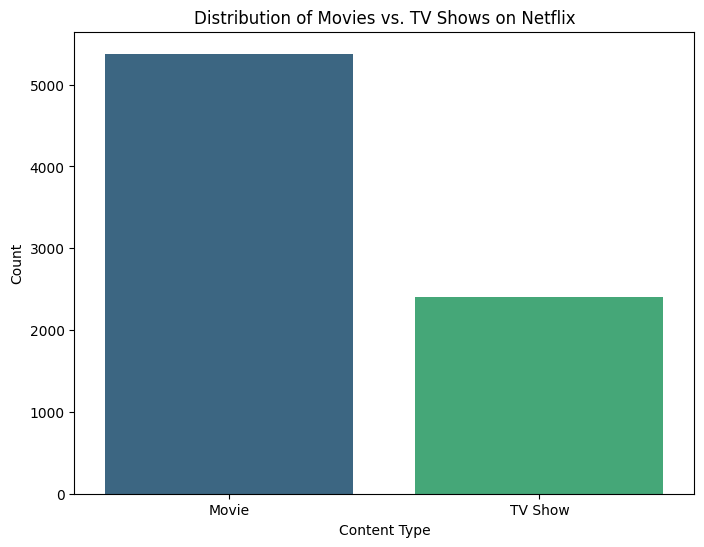

In [33]:
# Count the number of Movies vs. TV Shows
content_counts = df['type'].value_counts()

print("\nContent Type Distribution:")
print(content_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=content_counts.index, hue=content_counts.index, y=content_counts.values, palette='viridis')
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [34]:
# Create two separate dataframes for easier analysis
netflix_movies = df[df['type'] == 'Movie'].copy()
netflix_tvshows = df[df['type'] == 'TV Show'].copy()

print("Operation completed successfully ✅")

Operation completed successfully ✅


**Total Content Added Per Year**

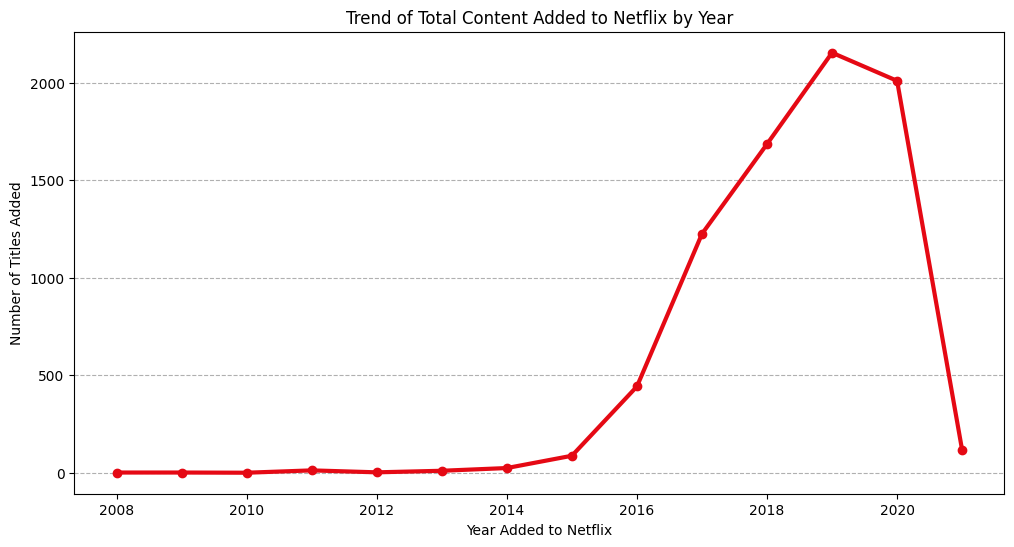

In [35]:
# Count the number of titles released per year
yearly_added_content = df.groupby('added_year')['show_id'].count()

plt.figure(figsize=(12, 6))
yearly_added_content.plot(kind='line', marker='o', color='#E50914', linewidth=3)
plt.title('Trend of Total Content Added to Netflix by Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles Added')
plt.xticks(yearly_added_content.index[::2]) # Show every second year for cleaner x-axis
plt.grid(axis='y', linestyle='--')
plt.show()

**Distribution of Movie Durations**

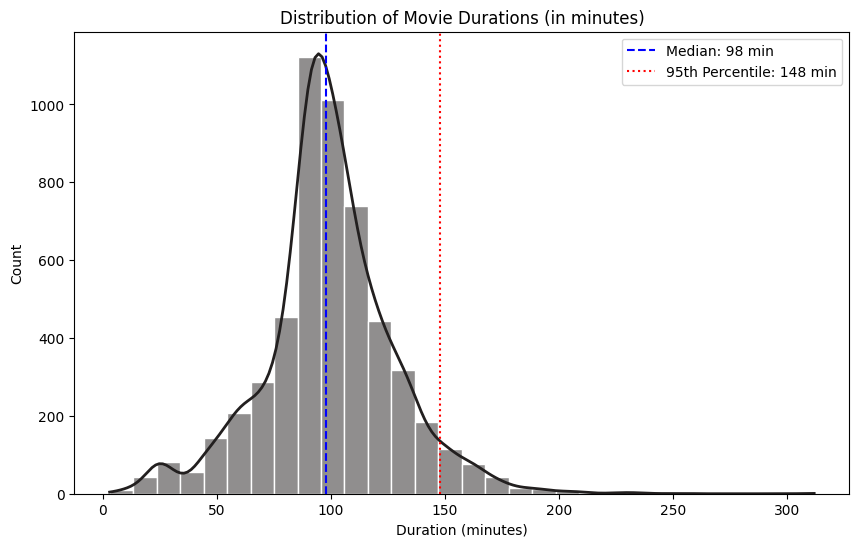

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=30, kde=True, color='#221f1f', edgecolor='white', line_kws={'linewidth': 2})
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

# Calculate the 95th percentile to understand the max duration of most movies
p95 = netflix_movies['duration'].quantile(0.95)
median_val = netflix_movies['duration'].median()

plt.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.0f} min')
plt.axvline(p95, color='red', linestyle=':', label=f'95th Percentile: {p95:.0f} min')
plt.legend()
plt.show()

**Top 10 Most Frequent Movie Genres**

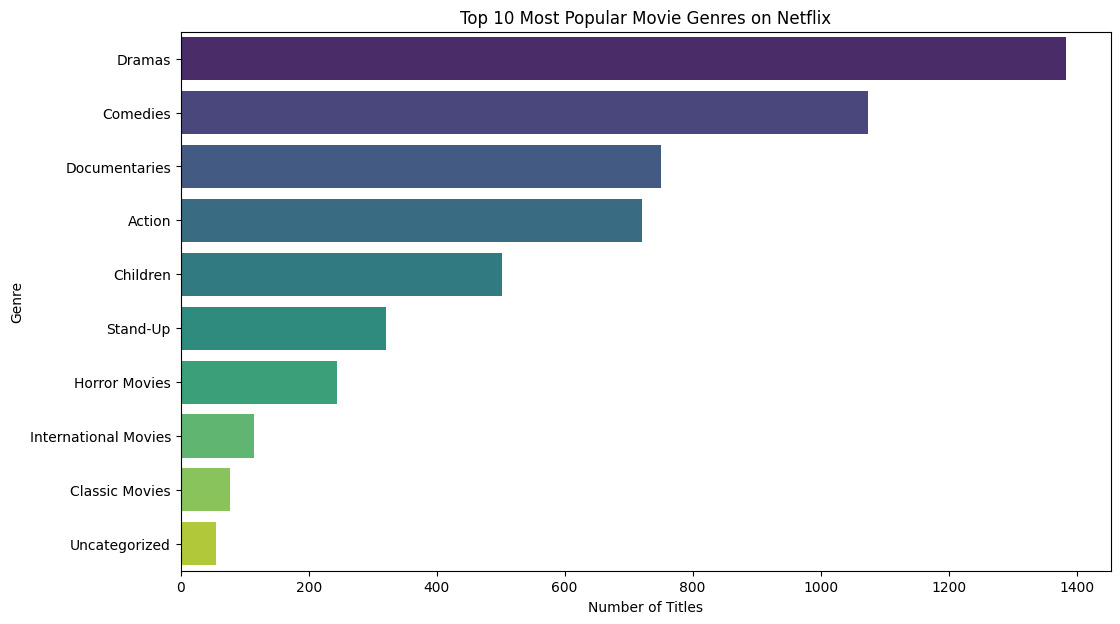

In [40]:
from collections import Counter

# Flatten the genre list and get the top 10 counts
all_genres = netflix_movies['genre'].explode()
top_genres = all_genres.value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='viridis')
plt.title('Top 10 Most Popular Movie Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

**Content Type Over Release Year**

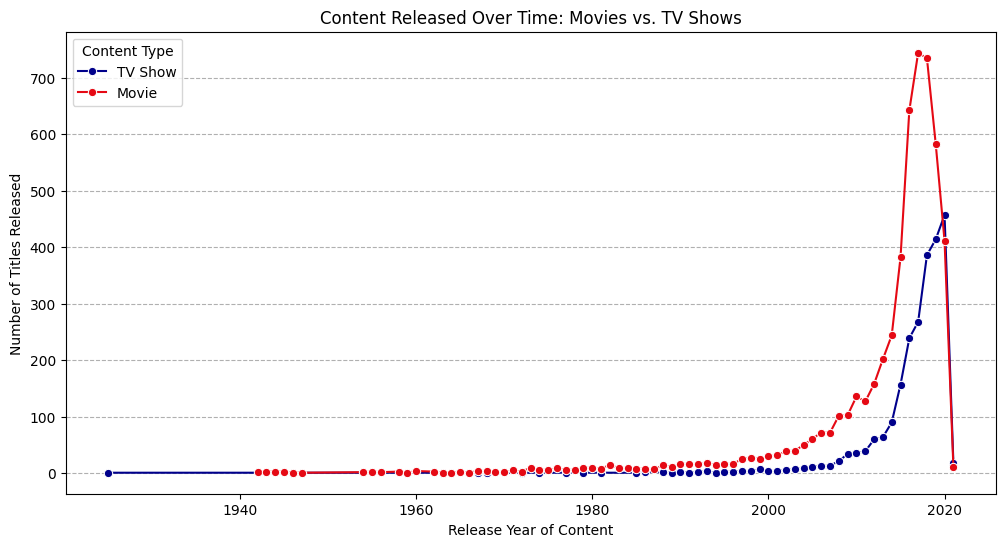

In [42]:
yearly_release = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
yearly_release.columns = ['release_year', 'type', 'count']

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_release, x='release_year', y='count', hue='type', 
             marker='o', palette={'Movie': '#E50914', 'TV Show': 'darkblue'})
plt.title('Content Released Over Time: Movies vs. TV Shows')
plt.xlabel('Release Year of Content')
plt.ylabel('Number of Titles Released')
plt.legend(title='Content Type')
plt.grid(axis='y', linestyle='--')
plt.show()

**Top Countries Analysis**

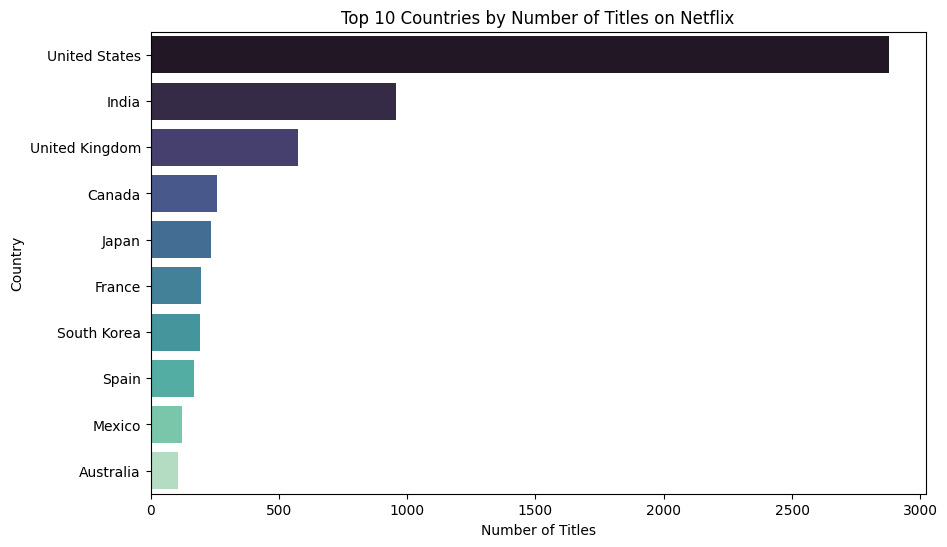

In [49]:
# Get the top 10 countries, excluding 'Unknown'
top_countries = df['country'].value_counts().drop(labels=['Unknown'], errors='ignore').head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='mako')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**Top Directors Analysis**

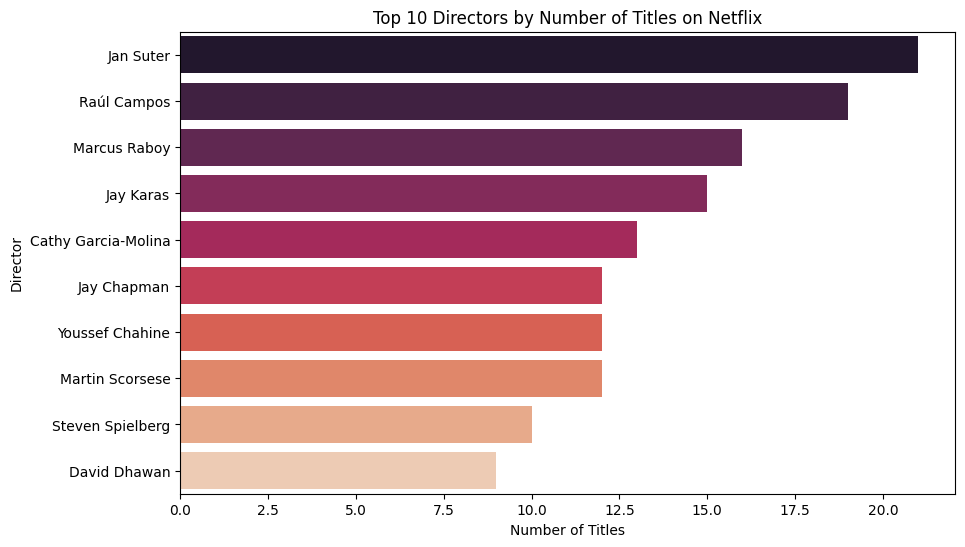

In [ ]:
# Split directors by comma, stack, and strip whitespace
director_counts = df['director'].str.split(',', expand=True).stack().str.strip()

# Get the top 10 directors, excluding 'Unknown'
top_directors = director_counts.value_counts().drop(labels=['Unknown'], errors='ignore').head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='rocket')
plt.title('Top 10 Directors by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

**Top Cast Analysis**

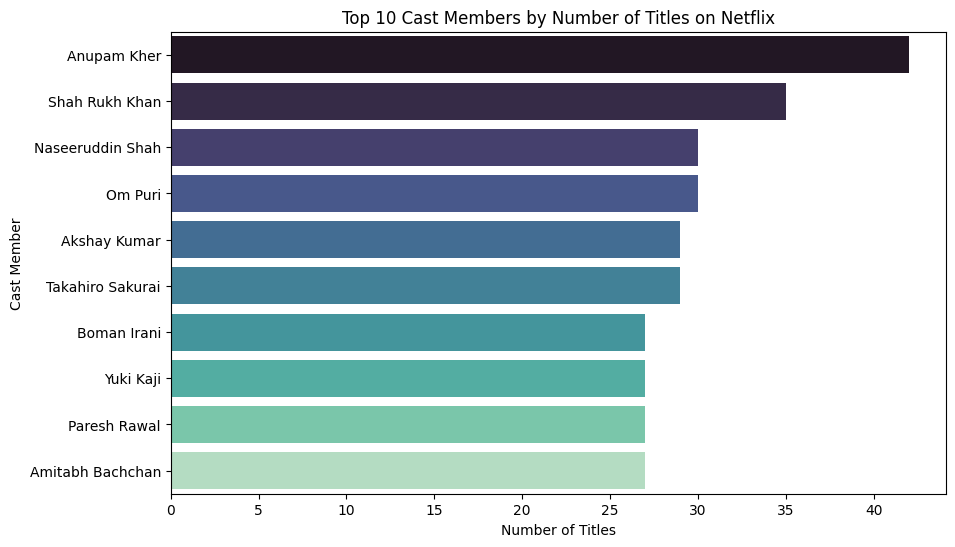

In [ ]:
# Split cast members by comma, stack, and strip whitespace
cast_counts = df['cast'].str.split(',', expand=True).stack().str.strip()

# Get the top 10 cast members, excluding 'Unknown'
top_cast = cast_counts.value_counts().drop(labels=['Unknown'], errors='ignore').head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cast.values, y=top_cast.index, hue=top_cast.index, palette='mako')
plt.title('Top 10 Cast Members by Number of Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Cast Member')
plt.show()

Distribution of durations per genre

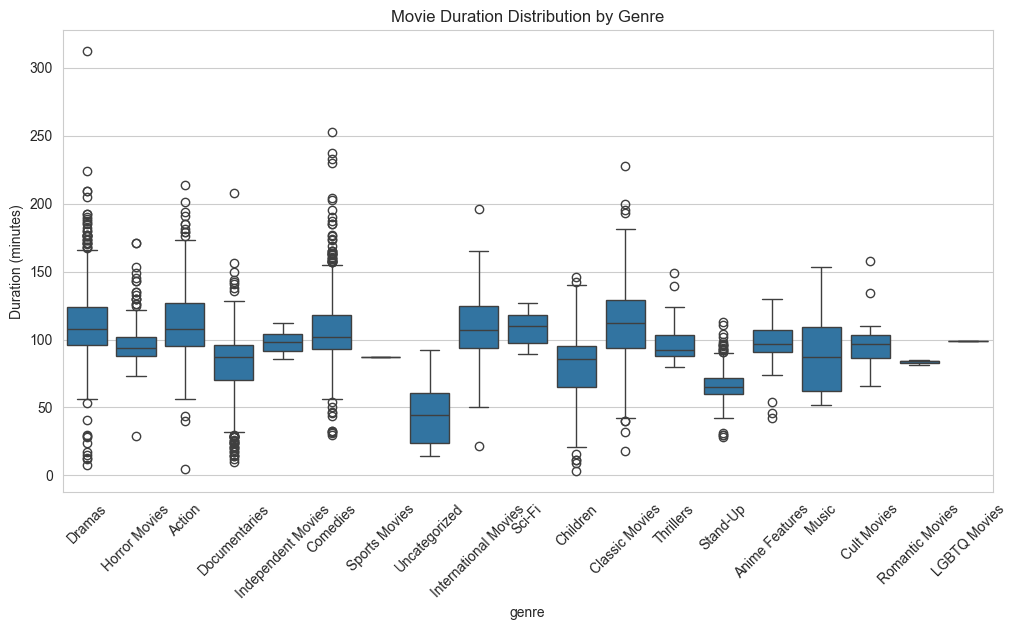

In [55]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='duration', data=netflix_movies)
plt.xticks(rotation=45)
plt.ylabel('Duration (minutes)')
plt.title('Movie Duration Distribution by Genre')
plt.show()